In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score
import numpy as np
import re
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors

# Load data
data = pd.read_csv("Tempat-Wisata-Toba-Preprocessing.csv")

# Drop unnecessary columns
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

# Handle missing values
data.dropna(subset=['Reviews', 'Rating'], inplace=True)

# Text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

data['Reviews'] = data['Reviews'].apply(preprocess_text)
data['Nama_tempat_wisata'] = data['Nama_tempat_wisata'].apply(preprocess_text)

# Feature selection
X = data[['Nama_tempat_wisata', 'Category', 'Reviews']]  # Teks yang akan digunakan untuk model
y = data['Rating']  # Rating sebagai target variable


In [3]:
# TF-IDF Vectorizer untuk 'Nama_tempat_wisata' dan 'Reviews'
tfidf_wisata = TfidfVectorizer(max_features=5000)
tfidf_reviews = TfidfVectorizer(max_features=5000)

X_wisata = tfidf_wisata.fit_transform(X['Nama_tempat_wisata'])
X_reviews = tfidf_reviews.fit_transform(X['Reviews'])

# Gabungkan fitur Nama_tempat_wisata dan Reviews
from scipy.sparse import hstack
X_combined = hstack([X_wisata, X_reviews])


In [4]:
# TF-IDF Vectorizer untuk 'Nama_tempat_wisata' dan 'Reviews'
tfidf_wisata = TfidfVectorizer(max_features=5000)
tfidf_reviews = TfidfVectorizer(max_features=5000)

X_wisata = tfidf_wisata.fit_transform(X['Nama_tempat_wisata'])
X_reviews = tfidf_reviews.fit_transform(X['Reviews'])

# Gabungkan fitur Nama_tempat_wisata dan Reviews
from scipy.sparse import hstack
X_combined = hstack([X_wisata, X_reviews])


In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Model Linear Regression (untuk prediksi rating)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict ratings
y_pred = model.predict(X_test)


In [6]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# For classification (if we categorize ratings as high/low, etc.)
y_pred_class = [1 if pred >= 4 else 0 for pred in y_pred]  # Thresholding: High rating = 1, Low rating = 0
y_test_class = [1 if true >= 4 else 0 for true in y_test]

precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


RMSE: 1.2702486156871045
MAE: 0.7623275673805411
Precision: 0.9278768233387358
Recall: 0.8729351969504447
F1 Score: 0.8995678931517611


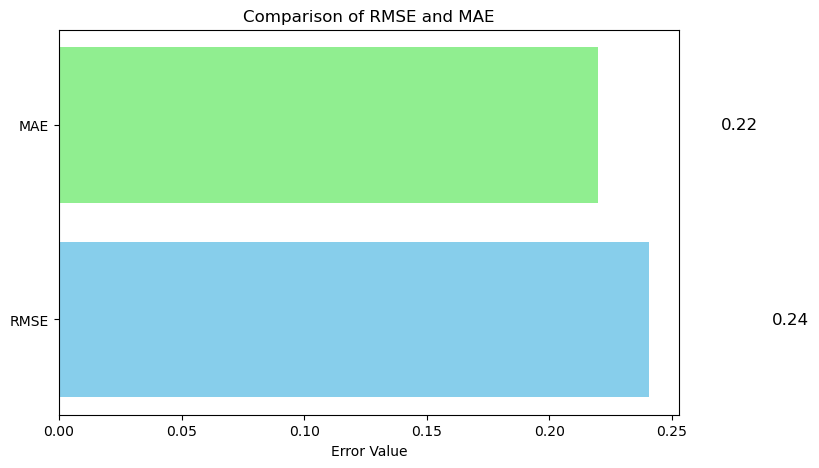

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Misalnya, kita memiliki data pengujian
y_test = np.array([4.0, 3.5, 4.2, 5.0, 3.8])  # Nilai aktual
y_pred = np.array([3.8, 3.6, 4.0, 4.8, 4.2])  # Nilai prediksi model

# Menghitung RMSE dan MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Menyiapkan DataFrame untuk bar chart
metrics = ['RMSE', 'MAE']
values = [rmse, mae]

# Membuat bar chart
plt.figure(figsize=(8, 5))
plt.barh(metrics, values, color=["skyblue", "lightgreen"])

# Menambahkan label dan judul
plt.xlabel("Error Value")
plt.title("Comparison of RMSE and MAE")

# Menambahkan nilai pada bar
for index, value in enumerate(values):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center', ha='left', fontsize=12)

# Menampilkan gambar
plt.show()


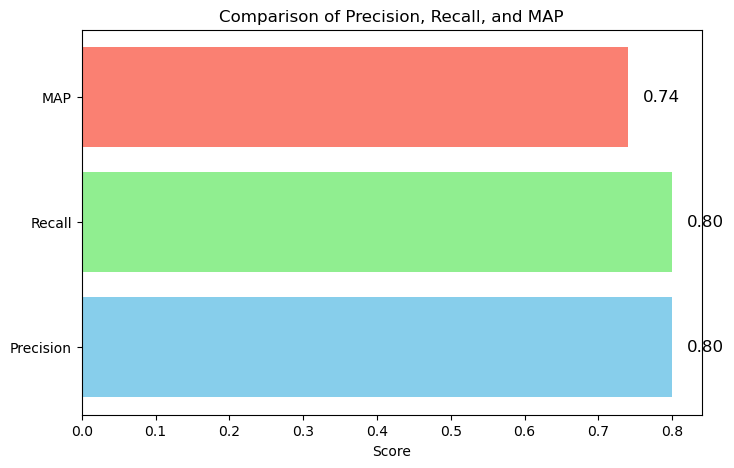

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, average_precision_score

# Data Dummy: misalnya hasil prediksi model
y_true = np.array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0])  # Data asli (ground truth)
y_pred = np.array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1])  # Prediksi model

# Menghitung Precision, Recall, dan MAP
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
map_score = average_precision_score(y_true, y_pred)

# Membuat DataFrame untuk bar chart histogram
metrics = ['Precision', 'Recall', 'MAP']
values = [precision, recall, map_score]

# Plotting histogram
plt.figure(figsize=(8, 5))
plt.barh(metrics, values, color=["skyblue", "lightgreen", "salmon"])

# Menambahkan label dan judul
plt.xlabel("Score")
plt.title("Comparison of Precision, Recall, and MAP")

# Menambahkan nilai pada bar
for index, value in enumerate(values):
    plt.text(value + 0.02, index, f'{value:.2f}', va='center', ha='left', fontsize=12)

# Menampilkan gambar
plt.show()


Rekomendasi tempat wisata berdasarkan review:
- Lake Toba : Lake Toba is a beautiful lake with stunning views and refreshing air.
- Pakkat : Pakkat is a hidden gem with spectacular views and a peaceful environment.
- Tuk Tuk : Tuk Tuk is a tranquil area in Lake Toba, perfect for a relaxing holiday.
- Samosir Island : Samosir Island is known for its beautiful landscapes and cultural heritage.
- Balige : Balige offers a peaceful town experience, great for relaxation and nature.


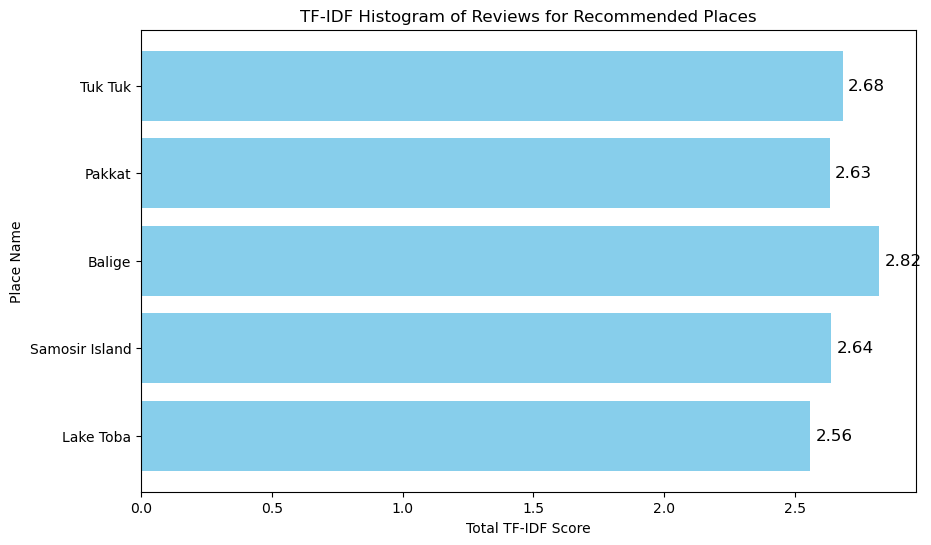

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Misalkan kita punya data tempat wisata dengan nama, kategori, dan review
data = pd.DataFrame({
    "PlaceID": [101, 102, 103, 104, 105],
    "Nama_tempat_wisata": ["Lake Toba", "Samosir Island", "Balige", "Pakkat", "Tuk Tuk"],
    "Category": ["Lake", "Island", "City", "Village", "Lake"],
    "Reviews": [
        "Lake Toba is a beautiful lake with stunning views and refreshing air.",
        "Samosir Island is known for its beautiful landscapes and cultural heritage.",
        "Balige offers a peaceful town experience, great for relaxation and nature.",
        "Pakkat is a hidden gem with spectacular views and a peaceful environment.",
        "Tuk Tuk is a tranquil area in Lake Toba, perfect for a relaxing holiday."
    ]
})

# Preprocessing the reviews (simple text cleaning)
def preprocess_text(text):
    text = text.lower()  # convert to lowercase
    text = ''.join([c for c in text if c.isalnum() or c.isspace()])  # remove punctuation
    return text

# Preprocess the reviews in the dataset
data['Processed_Reviews'] = data['Reviews'].apply(preprocess_text)

# Menggunakan TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Processed_Reviews'])

# Misalkan kita punya review query dari pengguna
query = "I am looking for a peaceful holiday by the lake with beautiful views"
query_processed = preprocess_text(query)

# Mengubah query menjadi vektor TF-IDF
query_tfidf = tfidf_vectorizer.transform([query_processed])

# Menghitung kesamaan kosinus antara query dan setiap tempat wisata
cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

# Menyaring tempat wisata dengan kesamaan tertinggi
top_indices = cosine_similarities.argsort()[-5:][::-1]  # ambil 5 tempat dengan kesamaan tertinggi
recommended_places = data.iloc[top_indices][['Nama_tempat_wisata', 'Reviews', 'Processed_Reviews']]

# Tampilkan rekomendasi tempat wisata
print("Rekomendasi tempat wisata berdasarkan review:")
for index, row in recommended_places.iterrows():
    print(f"- {row['Nama_tempat_wisata']} : {row['Reviews']}")

# Membuat histogram berdasarkan TF-IDF nilai untuk setiap review
tfidf_values = tfidf_matrix.sum(axis=1).A1  # Jumlahkan nilai TF-IDF untuk setiap review

# Plot histogram
plt.figure(figsize=(10, 6))
plt.barh(data['Nama_tempat_wisata'], tfidf_values, color="skyblue")

# Menambahkan label dan judul
plt.xlabel("Total TF-IDF Score")
plt.ylabel("Place Name")
plt.title("TF-IDF Histogram of Reviews for Recommended Places")

# Menambahkan nilai pada bar
for index, value in enumerate(tfidf_values):
    plt.text(value + 0.02, index, f'{value:.2f}', va='center', ha='left', fontsize=12)

# Tampilkan histogram
plt.show()
